In [64]:
import networkx as nx
import collections
from matplotlib import pylab as plt
import numpy as np
plt.rcParams['figure.dpi'] = 200

# The 3 types of networks

In [29]:
er = nx.erdos_renyi_graph(150, 0.02)
ba = nx.barabasi_albert_graph(150, 2)
ws = nx.connected_watts_strogatz_graph(150, 3, 0.15)



# Working with the Erdos Renyi graph

In this first part,  I am generating connected random graphs with density 0.02 (close to the Global Population Network density https://arxiv.org/pdf/2006.02208.pdf).
To generate this graphs I am using N=150 nodes (Critical density to generate giant component= 0.0066) and checking if the network is connected (i.e. Giant component = ER graph).


In [63]:
#auxn=0
#for i in range(1000000):
#    er = nx.erdos_renyi_graph(150, 0.02,seed=i)
#    a=nx.is_connected(er)
#    if a:
#        print(auxn,"si hay en ", i)
#        nx.write_adjlist(er, "ER_Graphs/"+str(auxn)+".txt")
#        auxn=auxn+1
# Delete # if it is needed to run ER graphs again

### Results
From 1 000 000 networks generated with different seeds, only 500 result in connected Erdos Renyi graphs, this is enough to create an annealed result of the final attack rates in an operator based meta-population SIR model. 

True


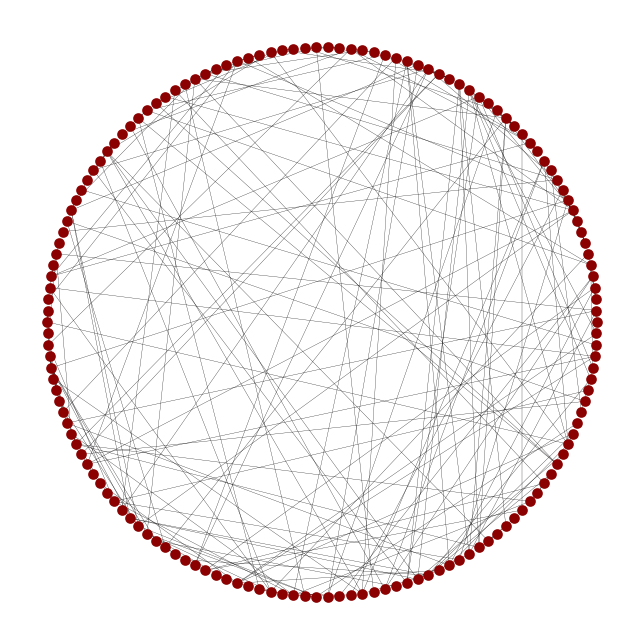

In [47]:
n1= nx.read_adjlist("ER_Graphs/1.txt")
print(nx.is_connected(n1))
pos = nx.circular_layout(n1)
plt.gca().set_aspect('equal')
nx.draw(n1,pos,node_size=8,node_color="darkred",width=0.1)


### Checking properties of the graphs
We'll check Density, Clustering, Average Path Lenght and Average degree

In [132]:
AD=[] # density
AC=[] # clustering
APL=[] # path lenght
AND=[] # node degree
for i in range(500):
    n1= nx.read_adjlist("ER_Graphs/"+str(i)+".txt")
    AD.append(nx.density(n1))
    AC.append(nx.average_clustering(n1))
    APL.append(nx.average_shortest_path_length(n1))
    auxnd=sum([d for (n, d) in nx.degree(n1)]) / float(n1.number_of_nodes())
    AND.append(auxnd)

In [133]:
av_AD=np.mean(np.array(AD))
av_AC=np.mean(np.array(AC))
av_APL=np.mean(np.array(APL))
av_AND=np.mean(np.array(AND))
print("For Erdos Renyi connected graphs: ")
print("Average density: " + str(av_AD))
print("Average clustering: " + str(av_AC))
print("Average path lenght: " + str(av_APL))
print("Average node degree: " + str(av_AND))

For Erdos Renyi connected graphs: 
Average density: 0.02205565995525727
Average clustering: 0.01688944018944019
Average path lenght: 4.401655123042506
Average node degree: 3.286293333333333


# Working with the Barabasi Albert Graphs




 To generate preferential attachment graphs comparable to the ER graphs, we used the network which density is closest to 0.02 by varying the number of new edges (m) with a target number of nodes of N=150. The closest density achieved is 0.026 with m=2. All BA networks are connected. 

In [176]:

#for i in range(500):
#    ba = nx.barabasi_albert_graph(150, 2,seed=i)
#    nx.write_adjlist(ba, "BA_Graphs/"+str(i)+".txt")

# Delete # if it is needed to run BA graphs again

### Results
As all BA networks are connected, we generate 500 graphs, which is enough to show a result for annealed simulations. 

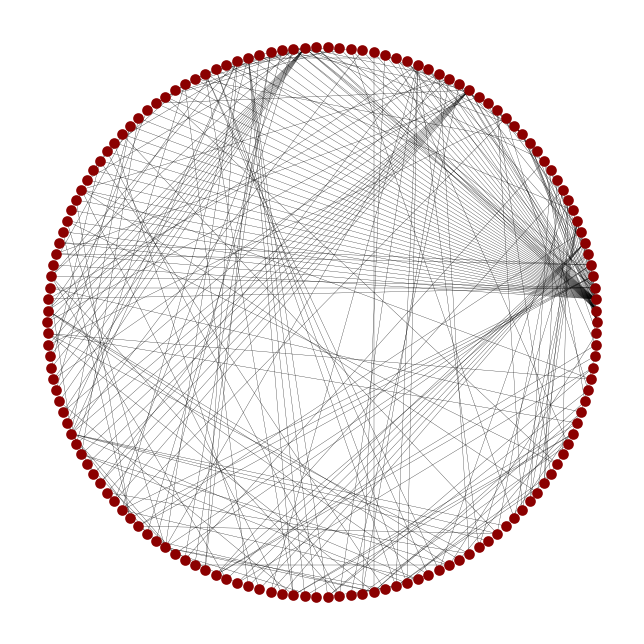

In [177]:
n2= nx.read_adjlist("BA_Graphs/1.txt")
pos = nx.circular_layout(n2)
plt.gca().set_aspect('equal')
nx.draw(n2,pos,node_size=8,node_color="darkred",width=0.1)

### Checking properties of the graphs
We'll check Density, Clustering, Average Path Lenght and Average degree

In [134]:
AD=[] # density
AC=[] # clustering
APL=[] # path lenght
AND=[] # node degree
for i in range(499):
    n2= nx.read_adjlist("BA_Graphs/"+str(i)+".txt")
    AD.append(nx.density(n2))
    AC.append(nx.average_clustering(n2))
    APL.append(nx.average_shortest_path_length(n2))
    auxnd=sum([d for (n, d) in nx.degree(n2)]) / float(n2.number_of_nodes())
    AND.append(auxnd)

In [136]:
av_AD=np.mean(np.array(AD))
av_AC=np.mean(np.array(AC))
av_APL=np.mean(np.array(APL))
av_AND=np.mean(np.array(AND))
print("For Barabasi Albert connected graphs: ")
print("Average density: " + str(av_AD))
print("Average clustering: " + str(av_AC))
print("Average path lenght: " + str(av_APL))
print("Average node degree: " + str(av_AND))

For Barabasi Albert connected graphs: 
Average density: 0.026487695749440713
Average clustering: 0.09800147400313841
Average path lenght: 3.2206580498805217
Average node degree: 3.946666666666666


# Working with the Watts Strogatz Graphs
The small world properties of the GMN have been shown recently (https://arxiv.org/pdf/2006.02208.pdf). I built the WS graphs by choosing the K that generates the network density closest to 0.02 (K=4). The rewiring probability (p) was chosen as the one which generates a clustering coefficent closest to 0.34 -CC of the GMN in 2010-2015- (p=0.15).  

In [179]:
#for i in range(500):
#    ws = nx.connected_watts_strogatz_graph(150, 4, 0.15,seed=i)
#    nx.write_adjlist(ws, "WS_Graphs/"+str(i)+".txt")

# Delete # if it is needed to run WS graphs again

### Results
As we are using a WS network generator that ensured connectivity, we generate 500 graphs, which is enough to show a result for annealed simulations. 

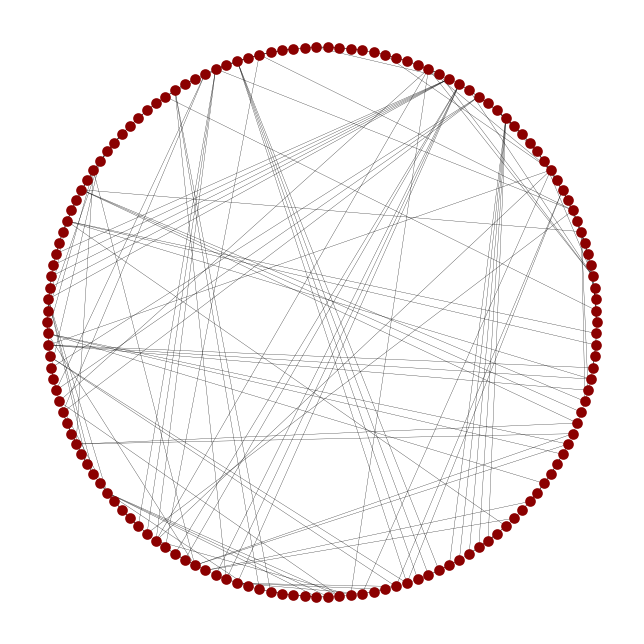

In [180]:
n3= nx.read_adjlist("WS_Graphs/1.txt")
pos = nx.circular_layout(n3)
plt.gca().set_aspect('equal')
nx.draw(n3,pos,node_size=8,node_color="darkred",width=0.1)

### Checking properties of the graphs
We'll check Density, Clustering, Average Path Lenght and Average degree

In [182]:
AD=[] # density
AC=[] # clustering
APL=[] # path lenght
AND=[] # node degree
for i in range(499):
    n3= nx.read_adjlist("WS_Graphs/"+str(i)+".txt")
    AD.append(nx.density(n3))
    AC.append(nx.average_clustering(n3))
    APL.append(nx.average_shortest_path_length(n3))
    auxnd=sum([d for (n, d) in nx.degree(n3)]) / float(n3.number_of_nodes())
    AND.append(auxnd)
    

In [183]:
av_AD=np.mean(np.array(AD))
av_AC=np.mean(np.array(AC))
av_APL=np.mean(np.array(APL))
av_AND=np.mean(np.array(AND))
print("For Barabasi Albert connected graphs: ")
print("Average density: " + str(av_AD))
print("Average clustering: " + str(av_AC))
print("Average path lenght: " + str(av_APL))
print("Average node degree: " + str(av_AND))

For Barabasi Albert connected graphs: 
Average density: 0.026845637583892617
Average clustering: 0.32294535101949945
Average path lenght: 5.072826278956122
Average node degree: 4.0
